# Loading Libraries

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [3]:
%matplotlib inline 
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

# Loading Dataset

In [4]:
df = pd.read_csv("telecomm.csv")
df_dict1 = pd.read_csv("data_dictionary.csv")

In [4]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
print(df_dict1)

       Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator ne

In [6]:
df.shape

(69999, 172)

In [7]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [8]:
print(df.isnull().sum())

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64


In [9]:
df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [11]:
def unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [12]:
unique_col_values(df)

last_date_of_month_6: ['6/30/2014']
last_date_of_month_7: ['7/31/2014' nan]
last_date_of_month_8: ['8/31/2014' nan]
date_of_last_rech_6: ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7: ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014']
date_of_last_rech_8: ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '

We want to drop some columns as we want to reduce the size of the data frame and for de-identification. 

In [13]:
df.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8','fb_user_6','fb_user_7','fb_user_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8' ], axis = 'columns', inplace = True)

In [15]:
#df.drop(['','','',''], axis = 'columns', inplace = True )
df.shape

(69999, 155)

In [17]:
def col_with_zero(df):
    zero_sum_columns = df.columns[df.eq(0).sum() > 0]
    for col in zero_sum_columns:
        zero_sum = (df[col] == 0).sum()
        print(f"Column '{col}' has {zero_sum} zero values.")
#col_with_zero(df)

We still have more features and the next stage is to minimise the featres inorder for us to find potential predictors

In [56]:
def print_col(df):
    for col in df.columns:
        print(col)
        
print_col(df)        

loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7
std_ic_t2t_mou_8
std_ic_t2m_mou_6
std_ic_t2m_mou_7
std_ic_t2m_mou_8
std_ic_t2f_mou_6
std_ic_t2f_mou_7
std_ic_t2f_mou_8
std_ic_mou_6
std_ic_mou_7
std_ic_mou_8
total_ic_mou_6
total_ic_mou_7
total_ic_mou_8
spl_ic_mou_6
spl_ic_mou_7
spl_ic_mou_8
isd_ic_mou_6
isd_ic_mou_7
isd_ic_mou_8
i

In [30]:
def add_col(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'av_rev_per_user'
df = add_col(df, 'arpu_6','arpu_7','arpu_8', new_col)
df.drop(['arpu_6','arpu_7','arpu_8'], axis='columns',inplace=True)

In [32]:
def add_col1(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'on_net'
df = add_col1(df, 'onnet_mou_6','onnet_mou_6','onnet_mou_6', new_col)
df.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8'],axis='columns',inplace=True)

In [37]:
def add_col2(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'off_net'
df = add_col2(df, 'offnet_mou_6','offnet_mou_7','offnet_mou_8', new_col)
df.drop(['offnet_mou_6','offnet_mou_7','offnet_mou_8'],axis='columns',inplace=True)

In [40]:
def add_col3(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'roam_ic'
df = add_col3(df, 'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8', new_col)
df.drop(['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],axis='columns',inplace=True)

In [43]:
def add_col4(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'roam_og'
df = add_col4(df, 'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8', new_col)
df.drop(['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],axis='columns',inplace=True)

In [46]:
def add_col5(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'loc_og_t2t'
df = add_col5(df, 'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8', new_col)
df.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'],axis='columns',inplace=True)

In [50]:
def add_col6(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'loc_og_t2m'
df = add_col6(df, 'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8', new_col)
df.drop(['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'],axis='columns',inplace=True)

In [55]:
def add_col7(df, col1, col2, col3, new_col):
    df[new_col] = df[col1] + df[col2] + df[col3]
    return df
new_col = 'volume_based_cost_3g'
df = add_col7(df, 'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g', new_col)
df.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g'],axis='columns',inplace=True)

# Visualising the data if it is balanced

(array([62867.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7132.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

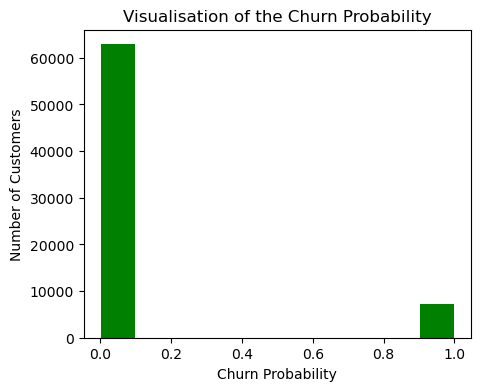

In [23]:
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.title("Visualisation of the Churn Probability")
plt.hist(df['churn_probability'], rwidth=0.95, color = 'green')

In [24]:
df1 = df['churn_probability'].value_counts()
print(df1)

0    62867
1     7132
Name: churn_probability, dtype: int64


<AxesSubplot:ylabel='Frequency'>

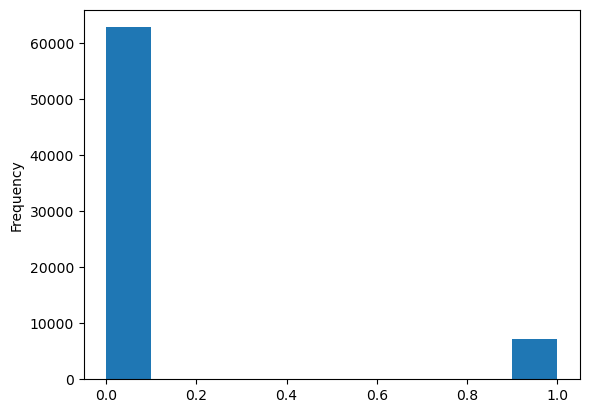

In [3]:
churn_p = df['churn_probability']
churn_p.plot(kind='hist')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
